In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: improve plot appearance
sns.set(style="whitegrid")


In [2]:
df = pd.read_csv(r"C:\Users\USER\Downloads\Electric_Vehicle_Population_Data (2).csv")

# Preview data
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE8L,Thurston,Tumwater,WA,98501.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,35.0,124633715,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10
1,5YJXCAE2XJ,Snohomish,Bothell,WA,98021.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,1.0,474826075,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJ3E1EBXK,King,Kent,WA,98031.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,47.0,280307233,POINT (-122.17743 47.41185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7SAYGDEE4T,King,Issaquah,WA,98027.0,2026,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,41.0,280786565,POINT (-122.03439 47.5301),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WAUUPBFF9G,King,Seattle,WA,98103.0,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16.0,43.0,198988891,POINT (-122.35436 47.67596),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


In [3]:
df.shape


(270262, 16)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270262 entries, 0 to 270261
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         270262 non-null  object 
 1   County                                             270252 non-null  object 
 2   City                                               270252 non-null  object 
 3   State                                              270262 non-null  object 
 4   Postal Code                                        270252 non-null  float64
 5   Model Year                                         270262 non-null  int64  
 6   Make                                               270262 non-null  object 
 7   Model                                              270262 non-null  object 
 8   Electric Vehicle Type                              270262 non-null  object

In [5]:
df.describe()


,Postal Code,Model Year,Electric Range,Legislative District,DOL Vehicle ID,2020 Census Tract
count,270252.000000,270262.000000,270257.000000,269613.000000,2.702620e+05,2.702520e+05
mean,98176.713849,2021.964468,40.386332,28.850107,2.441199e+08,5.297261e+10
std,2569.741818,3.053960,79.342202,14.895435,6.430872e+07,1.625614e+09
min,1030.000000,1999.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2021.000000,0.000000,17.000000,2.194414e+08,5.303301e+10
50%,98133.000000,2023.000000,0.000000,32.000000,2.615051e+08,5.303303e+10
75%,98382.000000,2024.000000,33.000000,42.000000,2.776210e+08,5.305394e+10
max,99577.000000,2026.000000,337.000000,49.000000,4.791150e+08,6.601095e+10


In [6]:
df.columns


Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Legislative District', 'DOL Vehicle ID', 'Vehicle Location',
       'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [7]:
df.columns = df.columns.str.strip()
df.columns




Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Legislative District', 'DOL Vehicle ID', 'Vehicle Location',
       'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [8]:
df.isnull().sum()


VIN (1-10)                                             0
County                                                10
City                                                  10
State                                                  0
Postal Code                                           10
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         5
Legislative District                                 649
DOL Vehicle ID                                         0
Vehicle Location                                      88
Electric Utility                                      10
2020 Census Tract                                     10
dtype: int64

In [9]:
# Handle Electric Range missing values
if "Electric Range" in df.columns:
    df["Electric Range"] = df["Electric Range"].fillna(df["Electric Range"].median())

# Drop rows with missing critical categorical data
df = df.dropna(subset=["Model Year", "Make", "Electric Vehicle Type"])



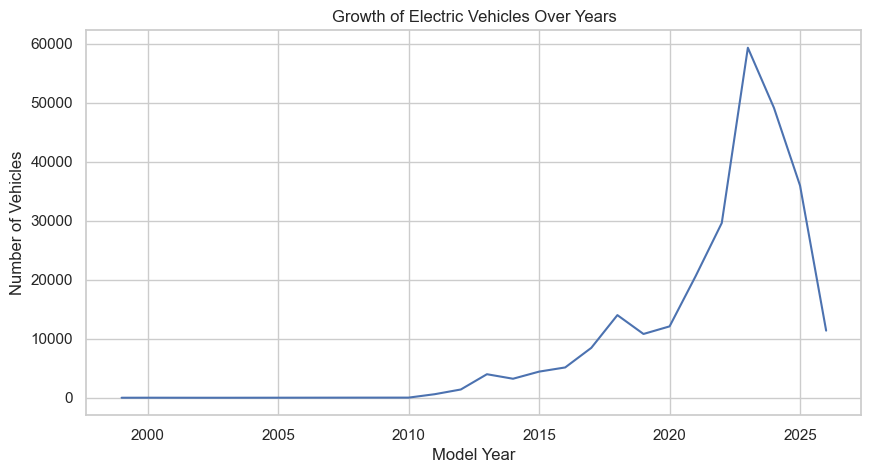

In [10]:
plt.figure(figsize=(10,5))
df["Model Year"].value_counts().sort_index().plot(kind="line")
plt.title("Growth of Electric Vehicles Over Years")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles")
plt.show()


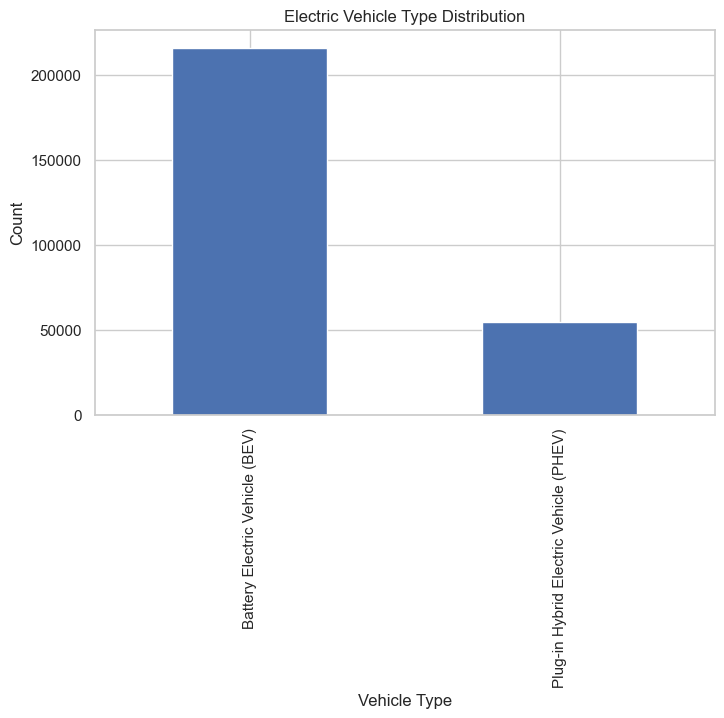

In [11]:
plt.figure(figsize=(8,5))
df["Electric Vehicle Type"].value_counts().plot(kind="bar")
plt.title("Electric Vehicle Type Distribution")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.show()


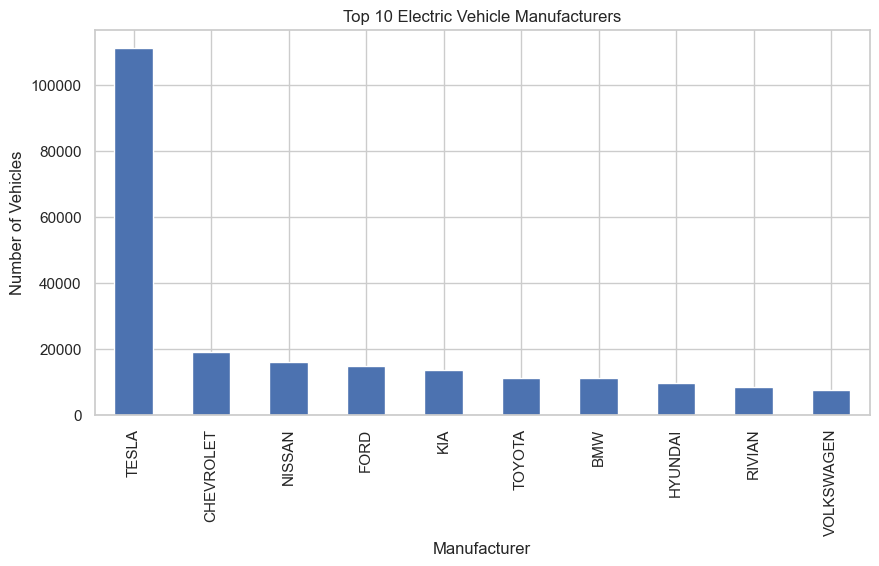

In [12]:
plt.figure(figsize=(10,5))
df["Make"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Electric Vehicle Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Number of Vehicles")
plt.show()


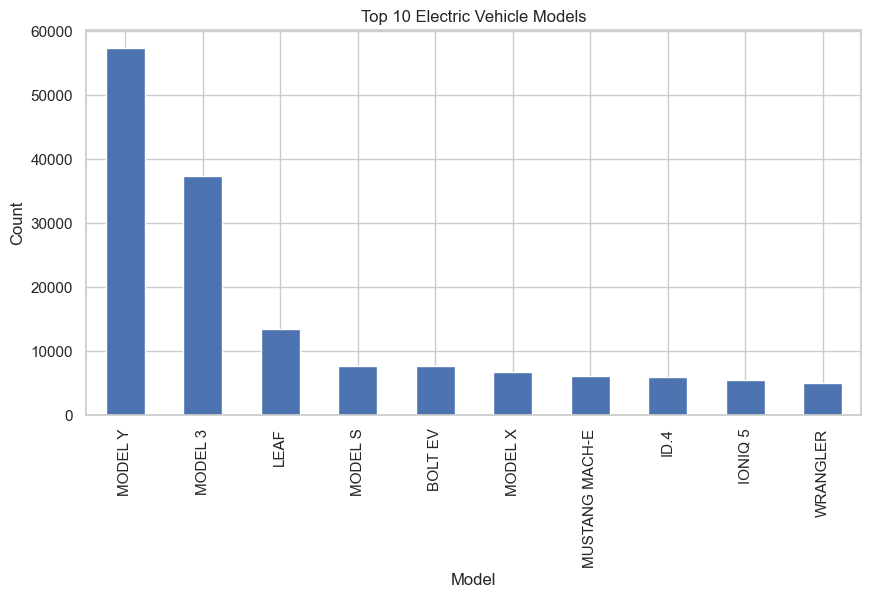

In [13]:
plt.figure(figsize=(10,5))
df["Model"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Electric Vehicle Models")
plt.xlabel("Model")
plt.ylabel("Count")
plt.show()


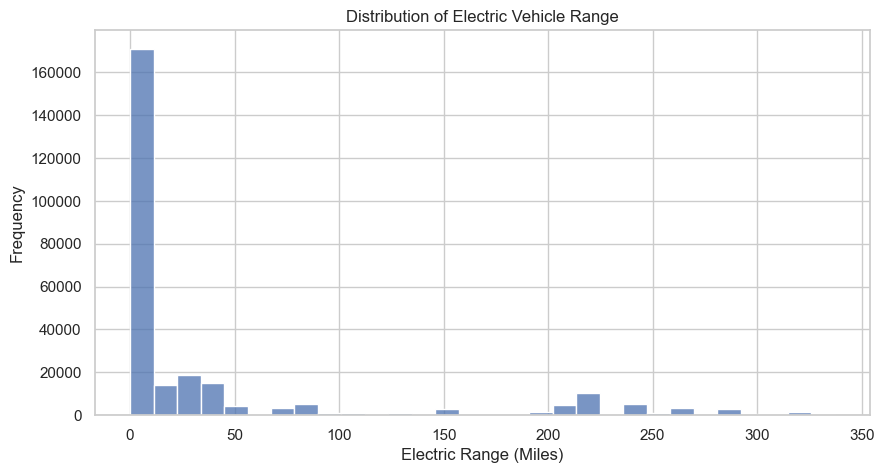

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df["Electric Range"], bins=30)
plt.title("Distribution of Electric Vehicle Range")
plt.xlabel("Electric Range (Miles)")
plt.ylabel("Frequency")
plt.show()


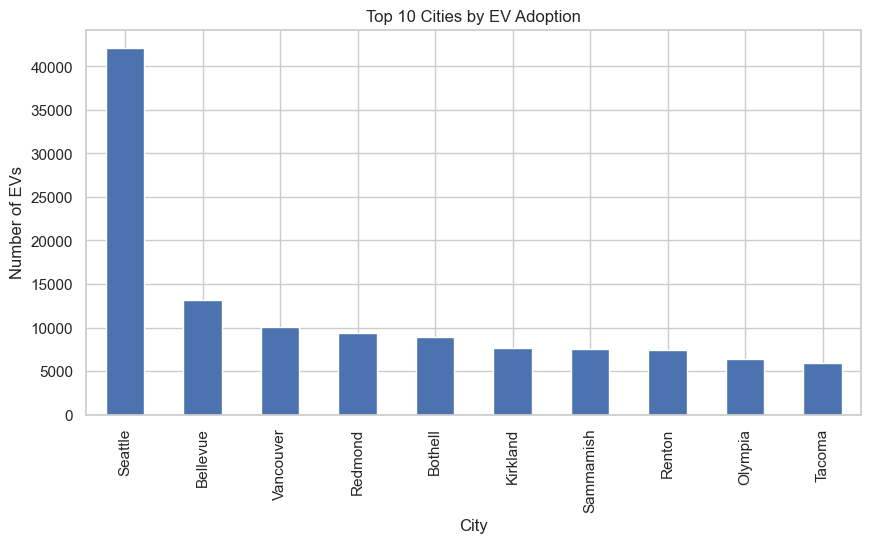

In [15]:
plt.figure(figsize=(10,5))
df["City"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Cities by EV Adoption")
plt.xlabel("City")
plt.ylabel("Number of EVs")
plt.show()


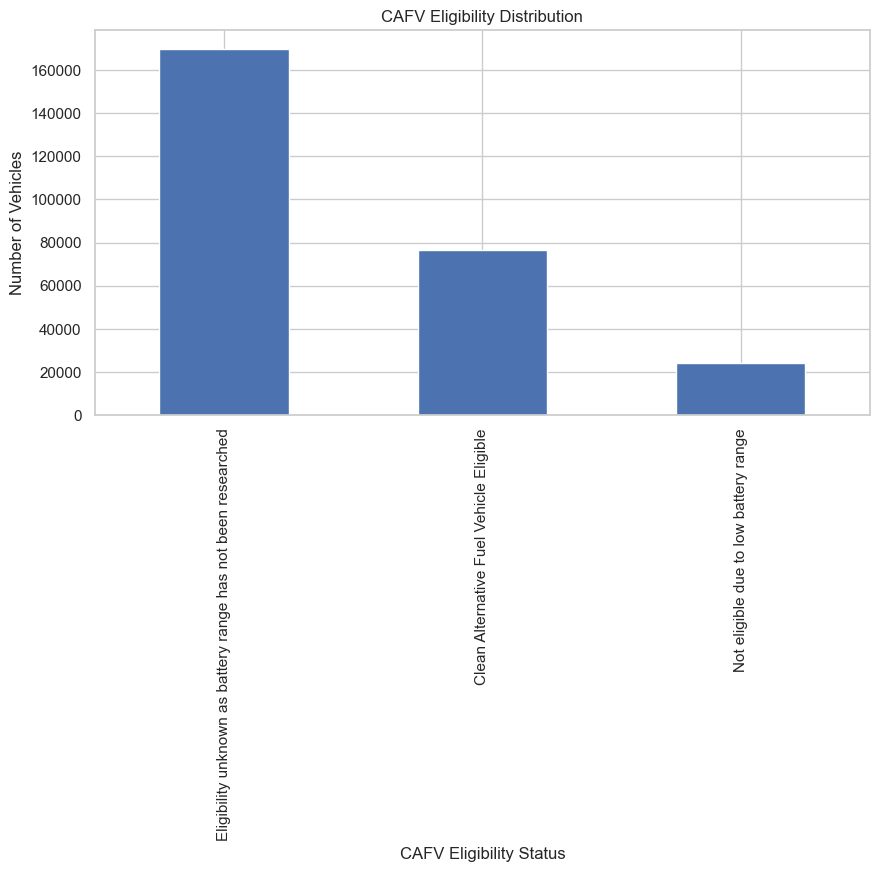

In [16]:
plt.figure(figsize=(10,5))
df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts().plot(kind="bar")
plt.title("CAFV Eligibility Distribution")
plt.xlabel("CAFV Eligibility Status")
plt.ylabel("Number of Vehicles")
plt.show()


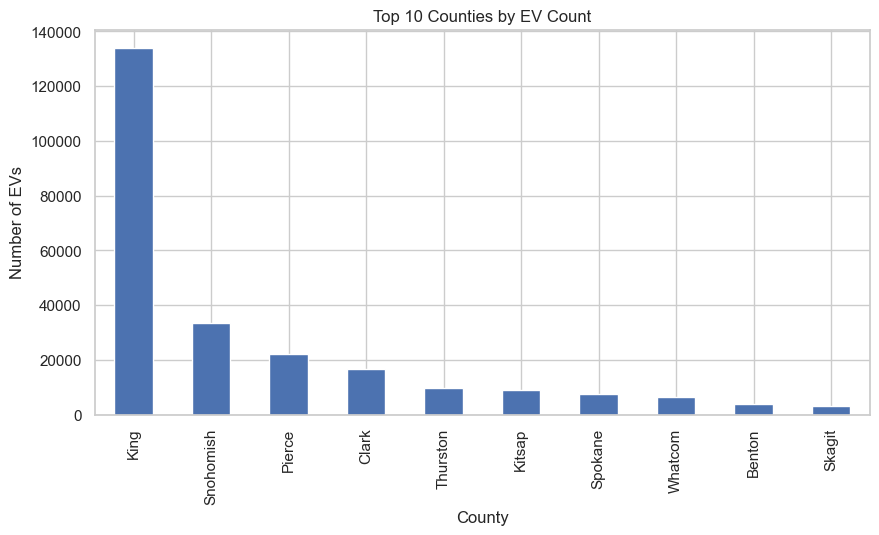

In [17]:
plt.figure(figsize=(10,5))
df["County"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Counties by EV Count")
plt.xlabel("County")
plt.ylabel("Number of EVs")
plt.show()


In [18]:
#Key Insights:
#1. Electric vehicle registrations have increased significantly in recent years.
#2. Battery Electric Vehicles dominate the EV market.
#3. A few manufacturers account for most EV registrations.
#4. Urban cities show higher EV adoption compared to rural areas.
#6. Electric range improvements reflect technological advancements.

                              

In [19]:
#Conclusion:
#This analysis provides insights into electric vehicle adoption trends across time, geography, and manufacturers.
#Although pricing data was unavailable, factors such as electric range, vehicle type, and policy eligibility offer
#valuable understanding for policymakers, manufacturers, and infrastructure planners.
